#MNIST Classifier - first Deep Learning project

A MNIST classifier works by taking a grayscale image of a handwritten digit (from 0 to 9) as input, analyzing the pixel values within the image using a machine learning model, typically a neural network, and then outputting the most likely digit that the image represents based on the learned patterns in the training data.

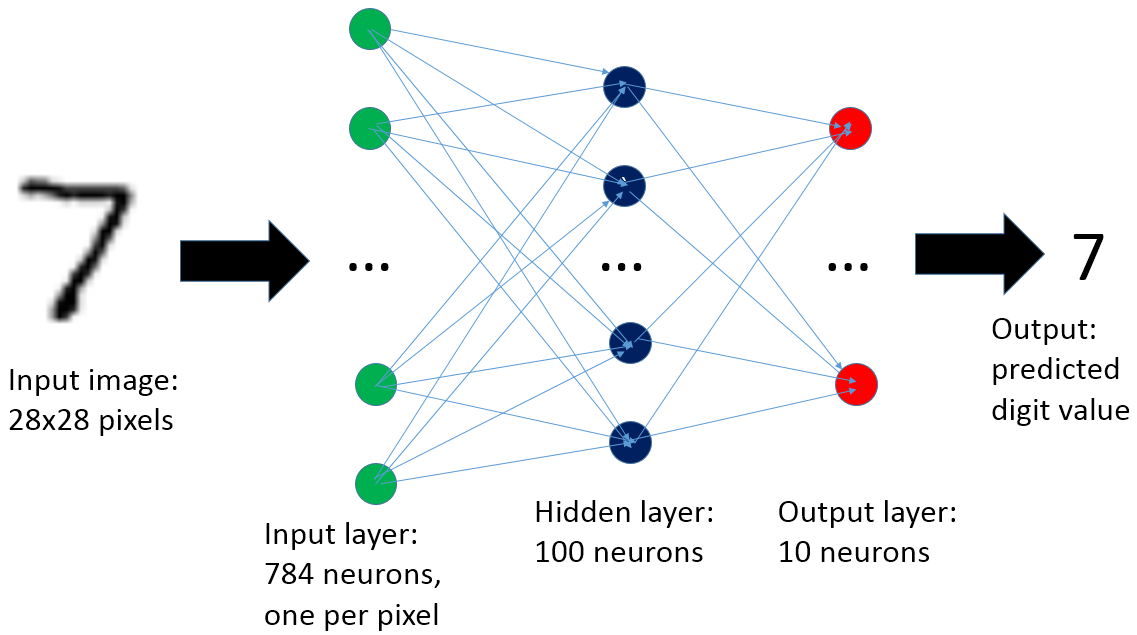

MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision.

In [ ]:
#!pip install keras

#!pip install keras
#!pip install tensorflow
#!pip install tensorflow==2.13.0

In [ ]:
#Import the required librarieS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load the datasets
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("Y_test shape",y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


In [ ]:
test_data=pd.read_csv('train.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])


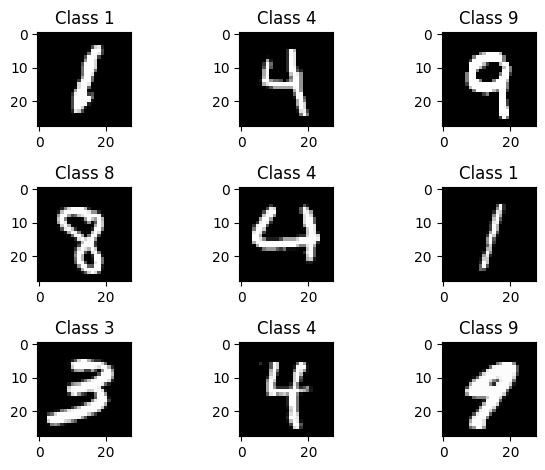

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(X_train))
  plt.imshow(X_train[num],cmap='gray',interpolation='none')
  plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we are randomly selecting 9 images from the dataset and plotting them to get an idea of the handwritten digits and their respective classes.


##Data Preprocessing

Note that we are working with grayscale images of dimension 28 x 28 pixels. If we have color images, we have 3 channels for RGB, i.e. 28 x 28 x 3, each with pixel value in the range 0 to 255.

In [ ]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

print("Traning matrix shape",X_train.shape)
print("Testing matrix shape",X_test.shape)


Traning matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
no_classes=10
y_train=to_categorical(y_train,no_classes)
y_test=to_categorical(y_test,no_classes)

##Building a 3-layer Neural Network¶


In [ ]:
#The sequential API allows you to create models layer-by-layer.
model=Sequential()

##First Hidden Layer

In [ ]:
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Dropout randomly selects a few nodes and nullifies their output
model.add(Dropout(0.2))

##Second Hidden Layer

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


##Final Output Layer

The Softmax Activation represents a probability distribution over n different possible outcomes

In [ ]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

##Model Chart



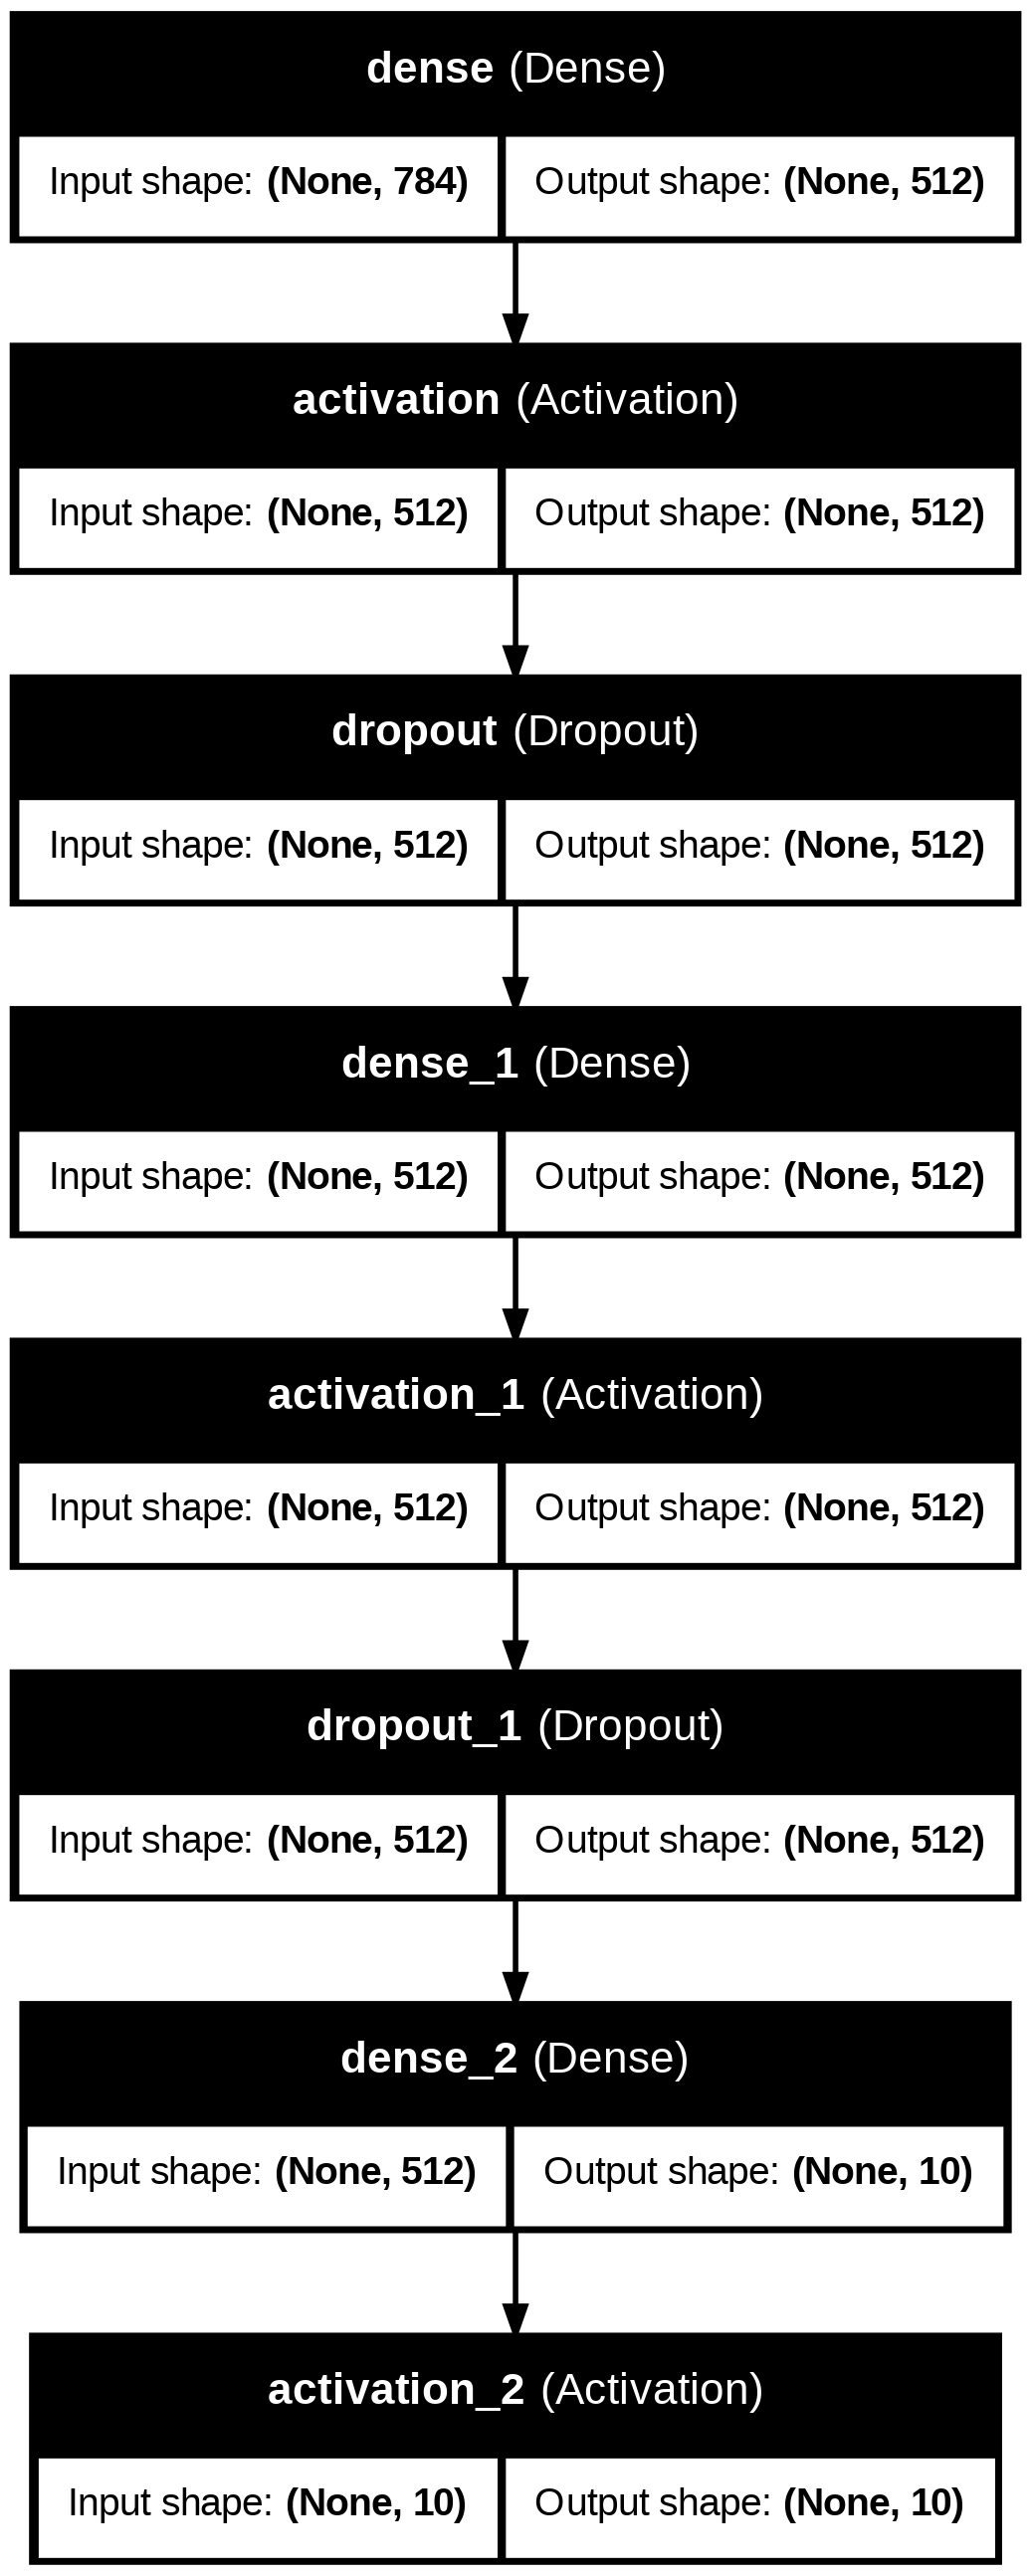

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

##Compiling the model

The loss function we'll use here is called categorical cross-entropy and is a loss function well-suited to comparing two probability distributions.

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the loss function




In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


The batch size determines how much data per step is used to compute the loss function, gradients, and backpropagation.

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8624 - loss: 0.4567
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9658 - loss: 0.1061
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9775 - loss: 0.0710
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9829 - loss: 0.0547
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9859 - loss: 0.0443
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9888 - loss: 0.0358
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9891 - loss: 0.0336
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9904 - loss: 0.0291
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9905 - loss: 0.0272
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9922 - loss: 0.0211


##Evaluate the model

In [ ]:
scor=model.evaluate(X_test,y_test)
print('Test accuracy:',scor[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9789 - loss: 0.0736
Test accuracy: 0.9824000000953674


Plot the accuracy and loss metrics of the model.

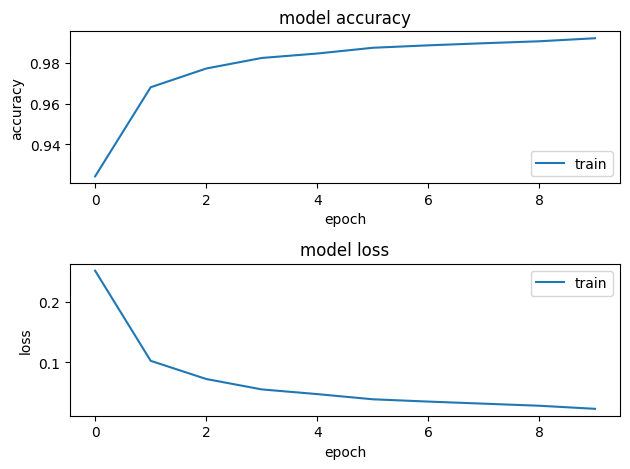

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
results = model.predict(test_data)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

ValueError: `axis` must be fewer than the number of dimensions (1)

In [ ]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

data.airports()

NameError: name 'data' is not defined

In [ ]:
submission

,ImageId,Label
0,1,1.0
1,2,0.0
2,3,1.0
3,4,4.0
4,5,0.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


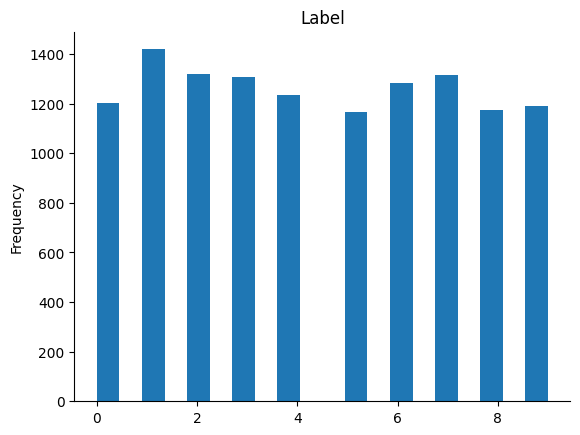

In [ ]:
from matplotlib import pyplot as plt
submission['Label'].plot(kind='hist', bins=20, title='Label')
plt.gca().spines[['top', 'right',]].set_visible(False)

Now let us introspect a few correctly and wrongly classified images to get a better understanding of where the model fails and hopefully take corrective measures to increse its accuracy.

In [ ]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

NameError: name 'correct_indices' is not defined

<Figure size 640x480 with 0 Axes>